# FLOOD PREDICTION

### INTRODUTION

This regression project focuses on analysing factors that influence flood risk and predicting flood levels based on various environmental and human-related variables. By examining attributes such as monsoon intensity, urbanization, and land management practices, it aims to build a predictive model that provides insights into flood behavior. Understanding these relationships is crucial for developing effective flood management strategies. Ultimately, this project seeks to enhance preparedness and response measures for flood events.

### AIM

The primary aim of this project is to create a robust regression model that accurately predicts flood levels based on key influencing factors. It will explore various regression techniques to identify the most effective approach for this analysis. Additionally, the project aims to highlight the significance of each factor in contributing to flood risk. The insights gained will assist policymakers and stakeholders in making informed decisions regarding flood management and prevention.




### IMPORTS

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import warnings

import pickle

from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRegressor

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error
from sklearn.preprocessing import scale

warnings.filterwarnings("ignore")
pd.set_option("display.max_columns", 100)

### READING DATA

In [3]:
df=pd.read_csv('train.csv')

### EDA

In [4]:
df.head()

,id,MonsoonIntensity,TopographyDrainage,RiverManagement,Deforestation,Urbanization,ClimateChange,DamsQuality,Siltation,AgriculturalPractices,Encroachments,IneffectiveDisasterPreparedness,DrainageSystems,CoastalVulnerability,Landslides,Watersheds,DeterioratingInfrastructure,PopulationScore,WetlandLoss,InadequatePlanning,PoliticalFactors,FloodProbability
0,0,5,8,5,8,6,4,4,3,3,4,2,5,3,3,5,4,7,5,7,3,0.445
1,1,6,7,4,4,8,8,3,5,4,6,9,7,2,0,3,5,3,3,4,3,0.450
2,2,6,5,6,7,3,7,1,5,4,5,6,7,3,7,5,6,8,2,3,3,0.530
3,3,3,4,6,5,4,8,4,7,6,8,5,2,4,7,4,4,6,5,7,5,0.535
4,4,5,3,2,6,4,4,3,3,3,3,5,2,2,6,6,4,1,2,3,5,0.415


In [5]:
df.shape

(1117957, 22)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1117957 entries, 0 to 1117956
Data columns (total 22 columns):
 #   Column                           Non-Null Count    Dtype  
---  ------                           --------------    -----  
 0   id                               1117957 non-null  int64  
 1   MonsoonIntensity                 1117957 non-null  int64  
 2   TopographyDrainage               1117957 non-null  int64  
 3   RiverManagement                  1117957 non-null  int64  
 4   Deforestation                    1117957 non-null  int64  
 5   Urbanization                     1117957 non-null  int64  
 6   ClimateChange                    1117957 non-null  int64  
 7   DamsQuality                      1117957 non-null  int64  
 8   Siltation                        1117957 non-null  int64  
 9   AgriculturalPractices            1117957 non-null  int64  
 10  Encroachments                    1117957 non-null  int64  
 11  IneffectiveDisasterPreparedness  1117957 non-null 

In [7]:
null_values = df.isnull().sum()
null_values[null_values>0]

Series([], dtype: int64)

### DATA VISUALISATION

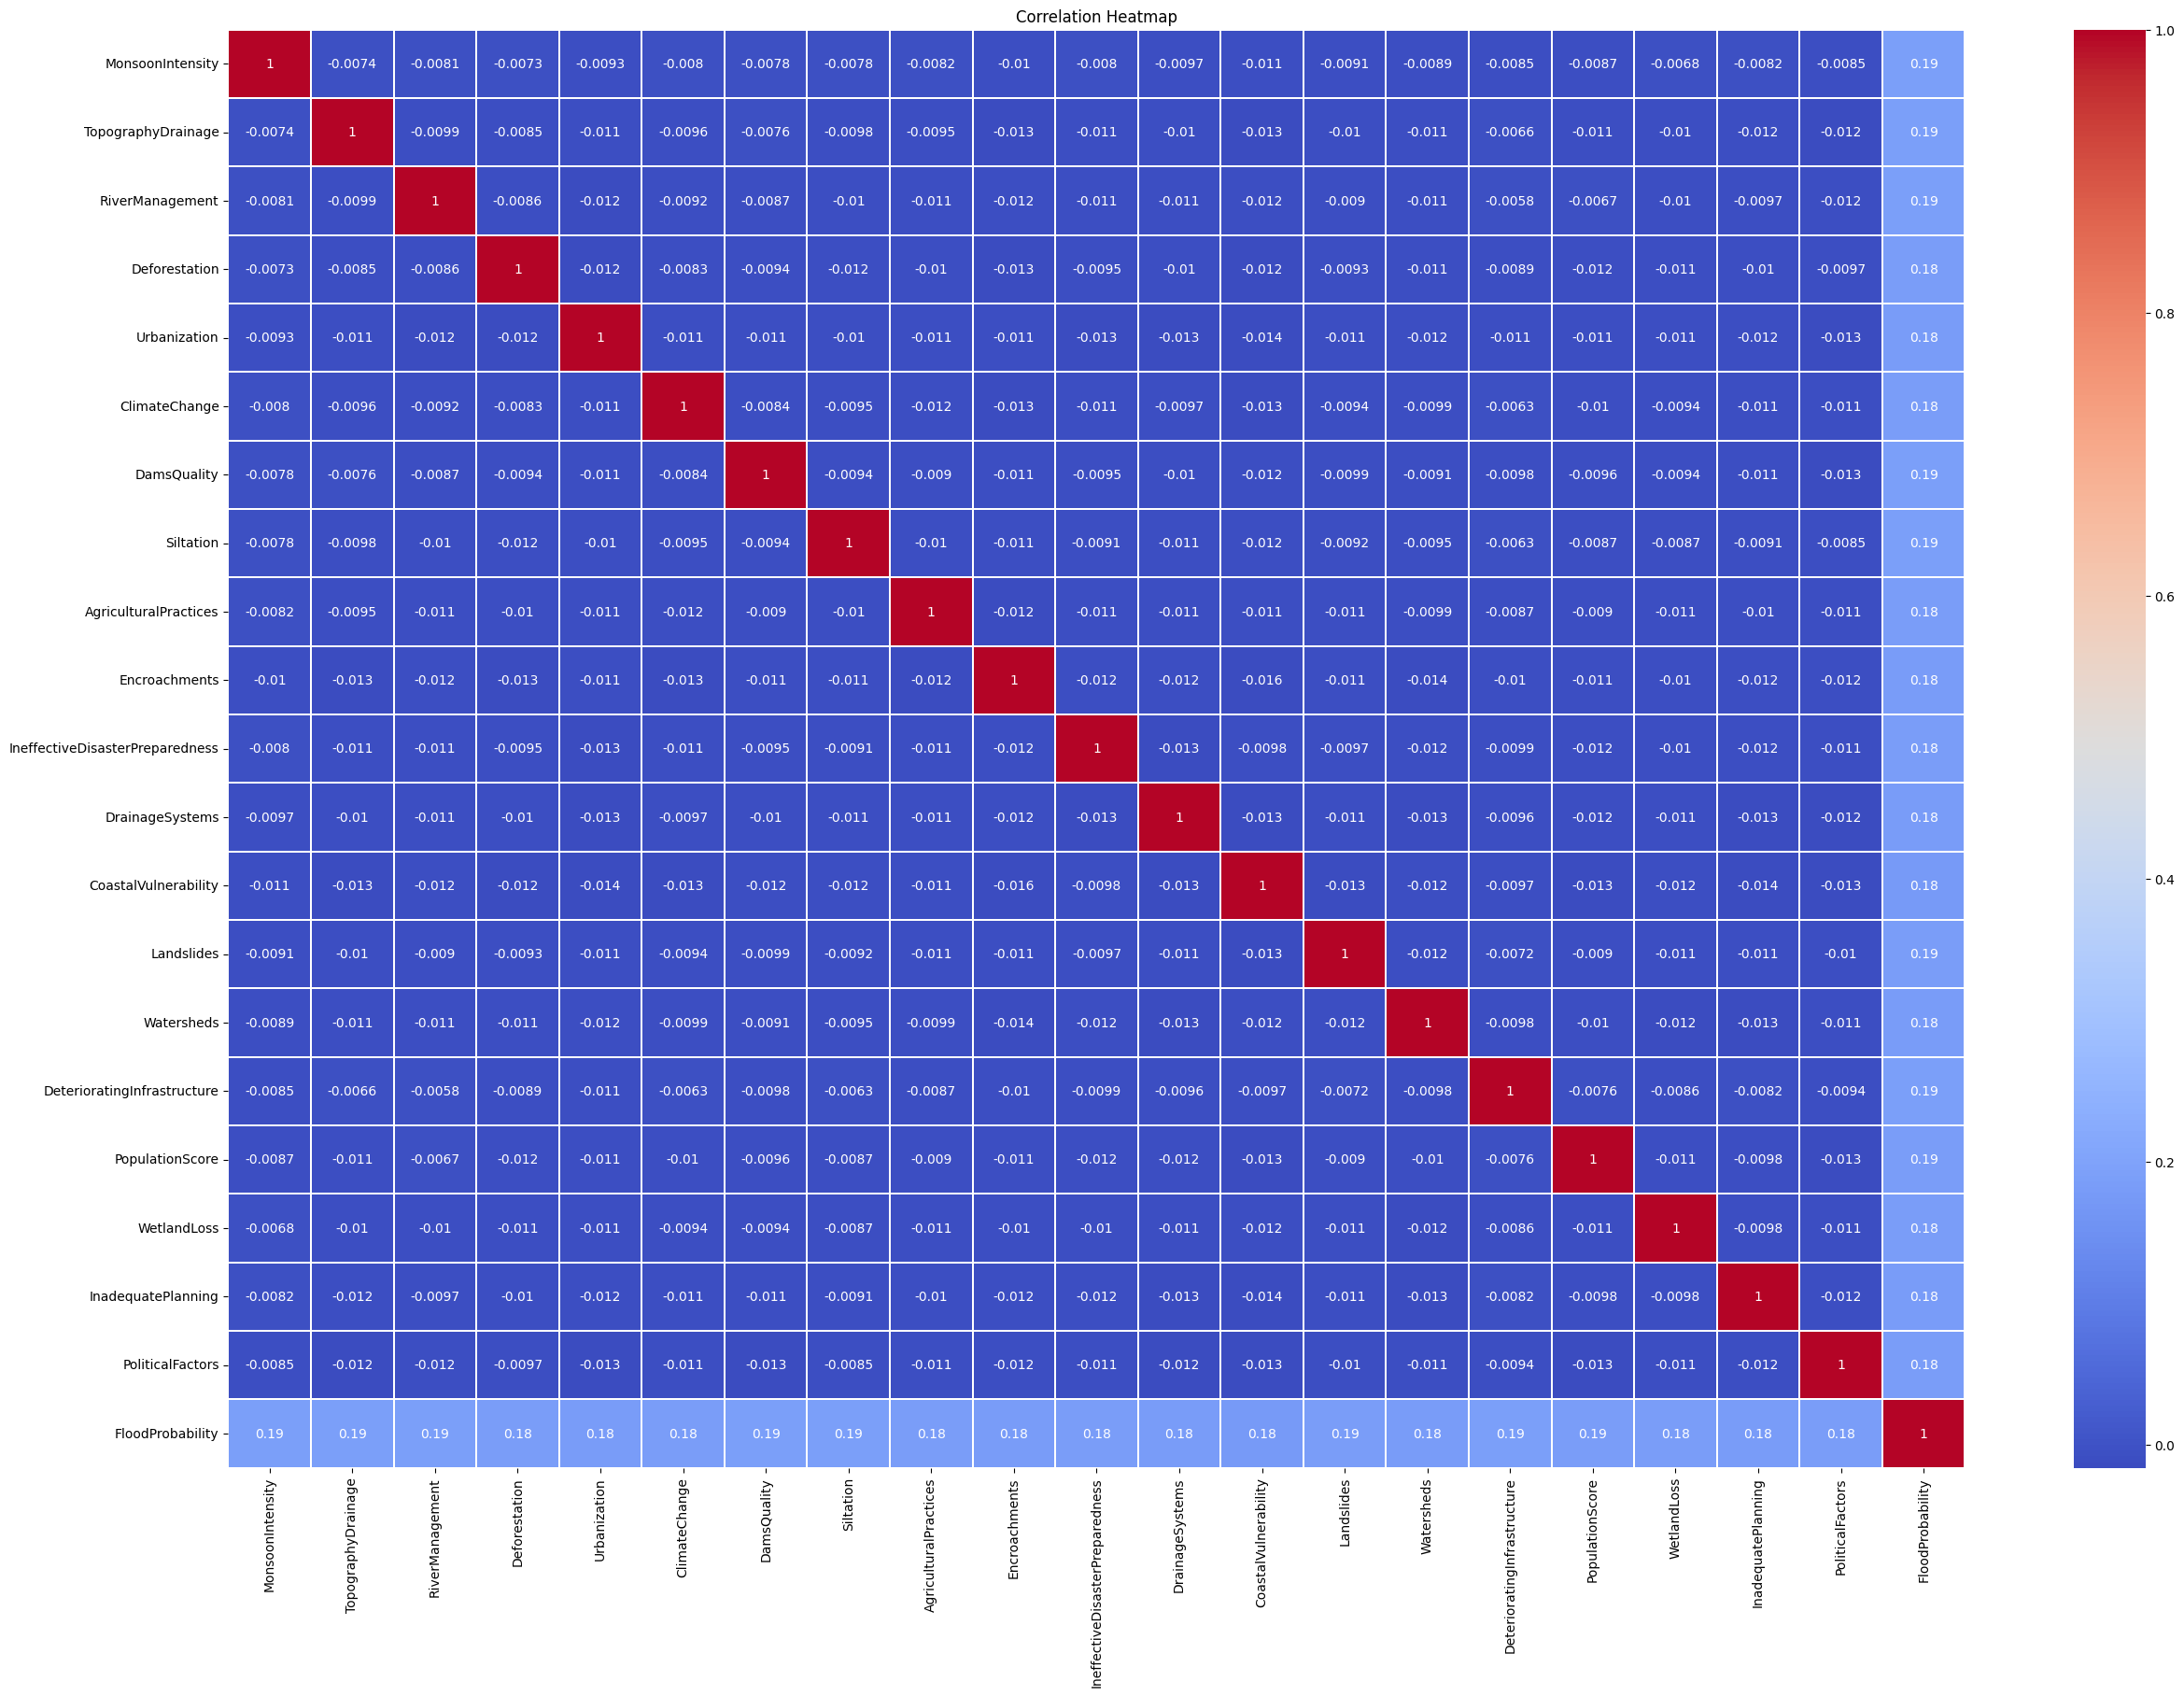

In [8]:
plt.figure(figsize=(30,20))
corr = df.drop('id',axis=1).corr(numeric_only=True)
sns.heatmap(corr, annot=True, cmap='coolwarm', linewidths=0.3)
plt.title('Correlation Heatmap')
plt.show()

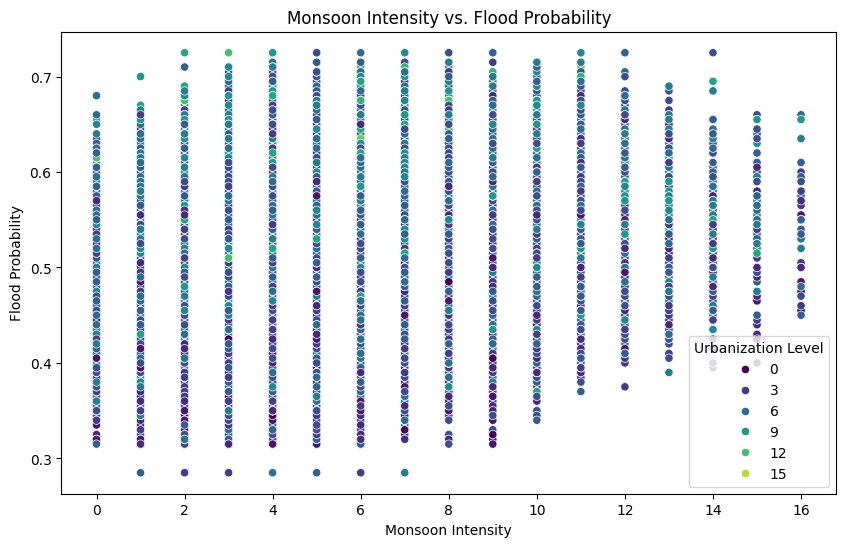

In [9]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='MonsoonIntensity', y='FloodProbability', hue='Urbanization', palette='viridis')
plt.title('Monsoon Intensity vs. Flood Probability')
plt.xlabel('Monsoon Intensity')
plt.ylabel('Flood Probability')
plt.legend(title='Urbanization Level')
plt.show()

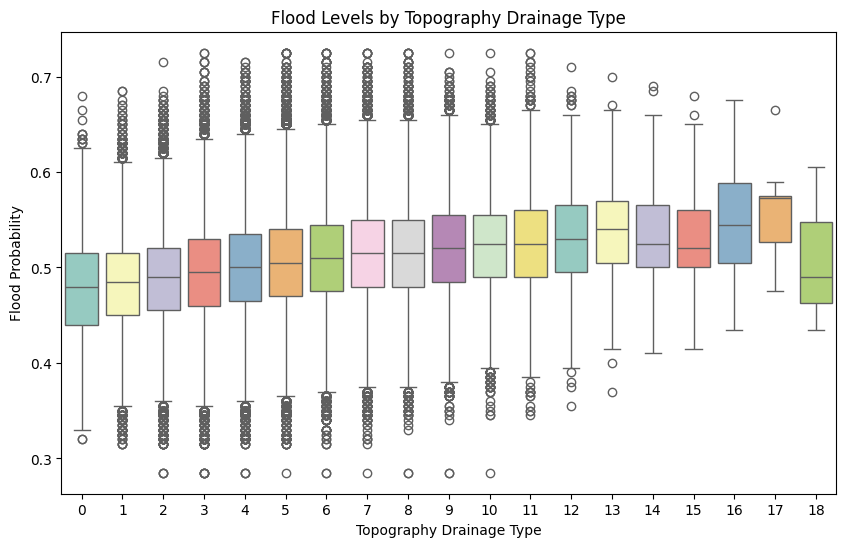

In [10]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='TopographyDrainage', y='FloodProbability', palette='Set3')
plt.title('Flood Levels by Topography Drainage Type')
plt.xlabel('Topography Drainage Type')
plt.ylabel('Flood Probability')
plt.show()

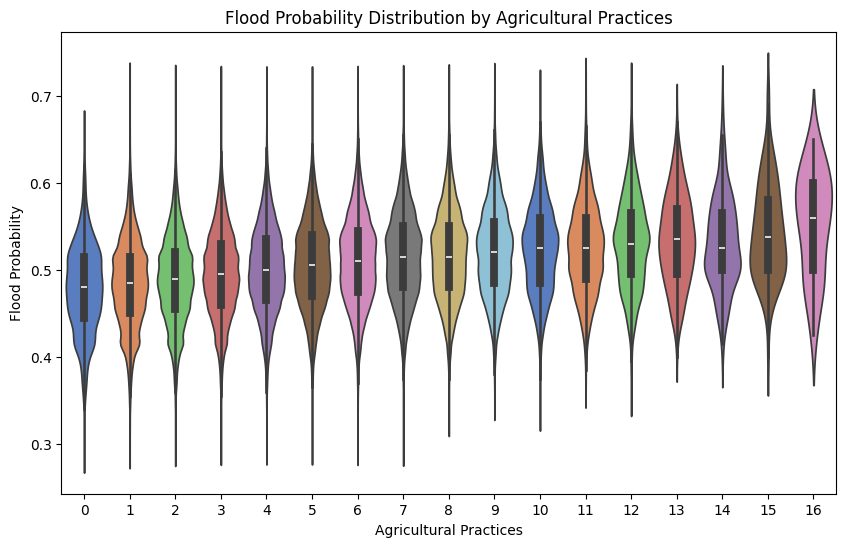

In [11]:
plt.figure(figsize=(10, 6))
sns.violinplot(data=df, x='AgriculturalPractices', y='FloodProbability', palette='muted')
plt.title('Flood Probability Distribution by Agricultural Practices')
plt.xlabel('Agricultural Practices')
plt.ylabel('Flood Probability')
plt.show()

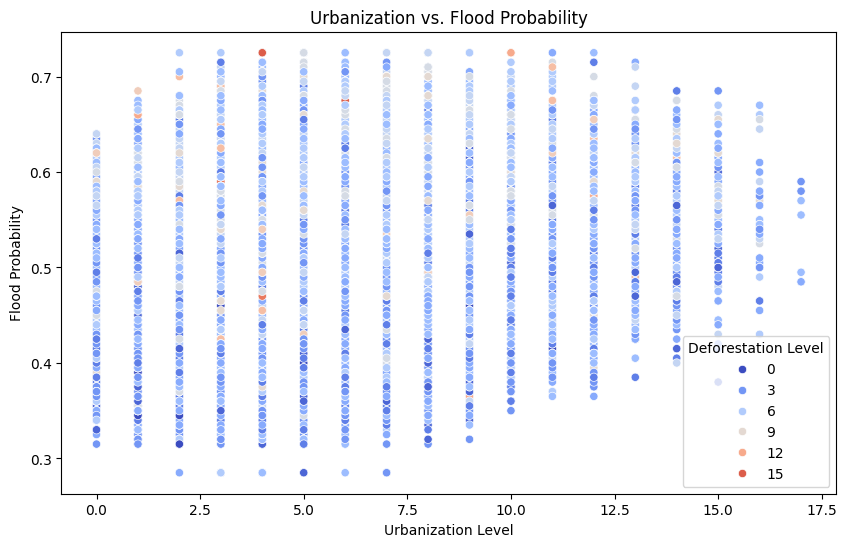

In [12]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Urbanization', y='FloodProbability', hue='Deforestation', palette='coolwarm')
plt.title('Urbanization vs. Flood Probability')
plt.xlabel('Urbanization Level')
plt.ylabel('Flood Probability')
plt.legend(title='Deforestation Level')
plt.show()

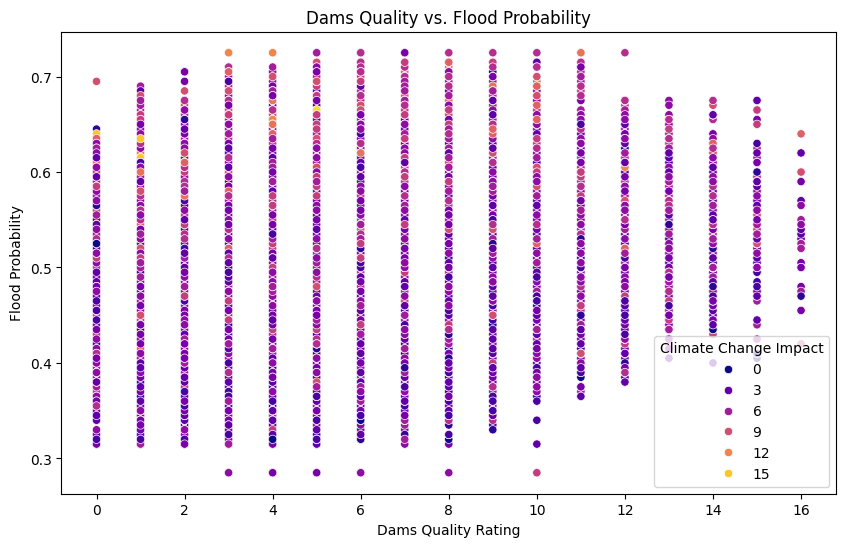

In [13]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='DamsQuality', y='FloodProbability', hue='ClimateChange', palette='plasma')
plt.title('Dams Quality vs. Flood Probability')
plt.xlabel('Dams Quality Rating')
plt.ylabel('Flood Probability')
plt.legend(title='Climate Change Impact')
plt.show()

### PREPARING TEST DATA

In [14]:
x=df.drop(['id','FloodProbability'],axis=1)
y=df[['FloodProbability']]

In [15]:
x.head()

,MonsoonIntensity,TopographyDrainage,RiverManagement,Deforestation,Urbanization,ClimateChange,DamsQuality,Siltation,AgriculturalPractices,Encroachments,IneffectiveDisasterPreparedness,DrainageSystems,CoastalVulnerability,Landslides,Watersheds,DeterioratingInfrastructure,PopulationScore,WetlandLoss,InadequatePlanning,PoliticalFactors
0,5,8,5,8,6,4,4,3,3,4,2,5,3,3,5,4,7,5,7,3
1,6,7,4,4,8,8,3,5,4,6,9,7,2,0,3,5,3,3,4,3
2,6,5,6,7,3,7,1,5,4,5,6,7,3,7,5,6,8,2,3,3
3,3,4,6,5,4,8,4,7,6,8,5,2,4,7,4,4,6,5,7,5
4,5,3,2,6,4,4,3,3,3,3,5,2,2,6,6,4,1,2,3,5


### PREDICTION

In [16]:
def train_regression_model(x, y):
    if isinstance(y, pd.DataFrame):
        y = y.squeeze()


    models = {
        'Linear Regression': LinearRegression(),
        'Ridge Regression': Ridge(),
        'XGBoost': XGBRegressor()
    }

    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

    for model_name, model in models.items():
        model.fit(x_train, y_train)
        y_pred = model.predict(x_test)

        mse = mean_squared_error(y_test, y_pred)
        rmse = np.sqrt(mse)
        mae = mean_absolute_error(y_test, y_pred)
        r2 = r2_score(y_test, y_pred)

        print(f"{model_name}:")
        print(f"  Mean Squared Error: {mse}")
        print(f"  Root Mean Squared Error: {rmse}")
        print(f"  Mean Absolute Error: {mae}")
        print(f"  R^2 Score: {r2}\n")

        # Plot residuals
        residuals = y_test - y_pred
        plt.figure(figsize=(12, 6))
        sns.histplot(residuals, bins=30, kde=True)
        plt.title(f'{model_name} Residuals Distribution')
        plt.xlabel('Residuals')
        plt.ylabel('Frequency')
        plt.axvline(0, color='red', linestyle='--')
        plt.show()

Linear Regression:
  Mean Squared Error: 0.0004032065870905584
  Root Mean Squared Error: 0.0200800046586289
  Mean Absolute Error: 0.015792471363760236
  R^2 Score: 0.8448773362840328



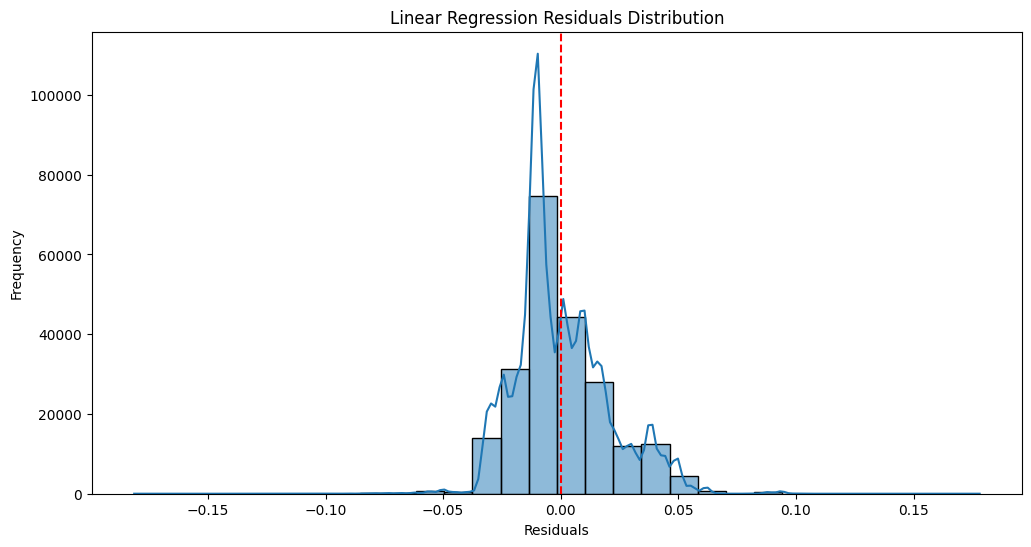

Ridge Regression:
  Mean Squared Error: 0.0004032065868085267
  Root Mean Squared Error: 0.0200800046516062
  Mean Absolute Error: 0.015792472328693068
  R^2 Score: 0.8448773363925367



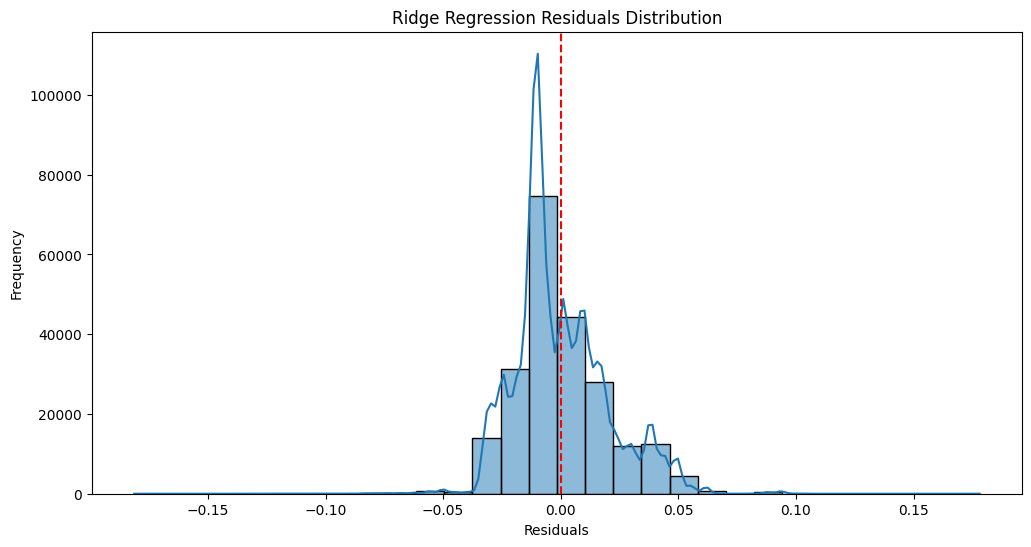

XGBoost:
  Mean Squared Error: 0.0004962876296730619
  Root Mean Squared Error: 0.02227751399220887
  Mean Absolute Error: 0.017587966576462263
  R^2 Score: 0.8090669608359393



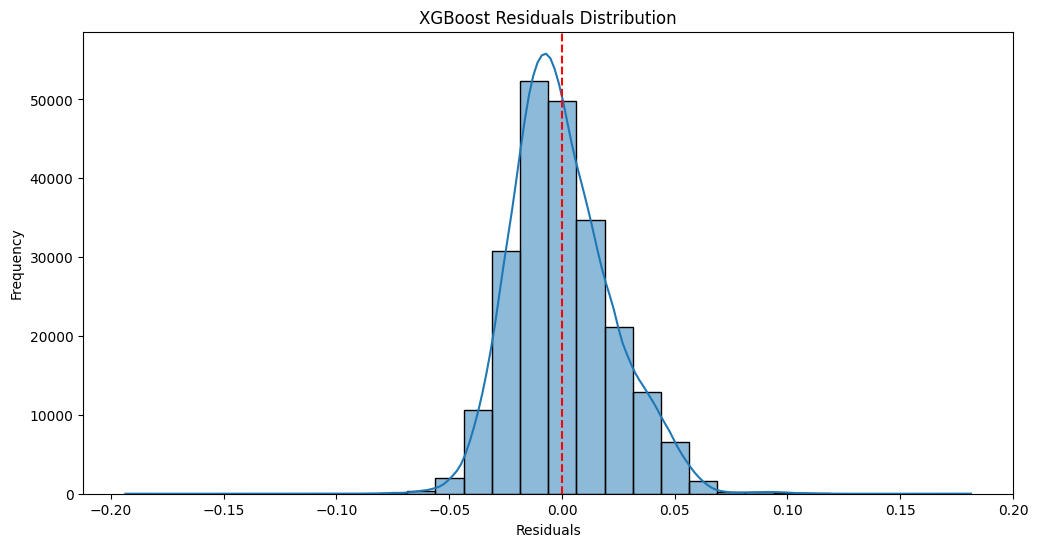

In [17]:
train_regression_model(x, y)

### SAVING MODEL

In [18]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(x_train, y_train)

predict = model.predict(x_test)

mse = mean_squared_error(y_test, predict)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, predict)
r2 = r2_score(y_test, predict)
print(f"Mean Squared Error: {mse}, \n Root Mean Squared Error: {rmse}, \n Mean Absolute Error: {mae}, \n R^2 Score: {r2}")


Mean Squared Error: 0.0004032065870905584, 
 Root Mean Squared Error: 0.0200800046586289, 
 Mean Absolute Error: 0.015792471363760236, 
 R^2 Score: 0.8448773362840328


In [19]:
with open('flood_prediction.pkl', 'wb') as file:
    pickle.dump(model, file)

### PREPARING SUBMISSION DATA

In [21]:
test_df=pd.read_csv('test.csv')

In [22]:
test_df.head()

,id,MonsoonIntensity,TopographyDrainage,RiverManagement,Deforestation,Urbanization,ClimateChange,DamsQuality,Siltation,AgriculturalPractices,Encroachments,IneffectiveDisasterPreparedness,DrainageSystems,CoastalVulnerability,Landslides,Watersheds,DeterioratingInfrastructure,PopulationScore,WetlandLoss,InadequatePlanning,PoliticalFactors
0,1117957,4,6,3,5,6,7,8,7,8,4,8,5,7,5,6,3,6,4,4,5
1,1117958,4,4,2,9,5,5,4,7,5,4,2,4,7,4,5,1,7,4,4,3
2,1117959,1,3,6,5,7,2,4,6,4,2,7,9,2,5,5,2,3,6,8,3
3,1117960,2,4,4,6,4,5,4,3,4,4,7,8,4,6,7,6,4,2,4,4
4,1117961,6,3,2,4,6,4,5,5,3,7,4,3,2,6,4,6,8,4,5,5


In [23]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 745305 entries, 0 to 745304
Data columns (total 21 columns):
 #   Column                           Non-Null Count   Dtype
---  ------                           --------------   -----
 0   id                               745305 non-null  int64
 1   MonsoonIntensity                 745305 non-null  int64
 2   TopographyDrainage               745305 non-null  int64
 3   RiverManagement                  745305 non-null  int64
 4   Deforestation                    745305 non-null  int64
 5   Urbanization                     745305 non-null  int64
 6   ClimateChange                    745305 non-null  int64
 7   DamsQuality                      745305 non-null  int64
 8   Siltation                        745305 non-null  int64
 9   AgriculturalPractices            745305 non-null  int64
 10  Encroachments                    745305 non-null  int64
 11  IneffectiveDisasterPreparedness  745305 non-null  int64
 12  DrainageSystems               

### HANDLING NULL VALUES

In [24]:
null_values = test_df.isnull().sum()
null_values[null_values>0]

Series([], dtype: int64)

In [25]:
pred_x=test_df.drop(['id'],axis=1)

In [26]:
predictions = model.predict(pred_x)

### SUBMISSION

In [27]:
submision = pd.DataFrame()
submision['id'] = test_df['id']
submision['FloodProbability'] = predictions

In [28]:
submision.head()

,id,FloodProbability
0,1117957,0.573613
1,1117958,0.455271
2,1117959,0.454752
3,1117960,0.466179
4,1117961,0.466085


In [29]:
submision.to_csv('submission.csv', index=False)

### CONCLUSION

The Linear Regression model effectively predicted product prices based on various attributes. Key performance metrics, including MSE, RMSE, MAE, and R² Score, indicated its reliability.

While Linear Regression is a useful tool for making informed pricing decisions, it is important to consider other models, such as Random Forest, SVR, and Gradient Boosting, for potentially improved accuracy and robustness. Future analysis could compare these models to identify the best approach for different scenarios.

## Variables of dataset description

### DATA SET

* MonsoonIntensity: Refers to the strength and duration of monsoon rains, significantly influencing flood levels.
* TopographyDrainage: Involves the landscape features and drainage patterns that affect how water flows and accumulates during heavy rainfall.
* RiverManagement: Encompasses strategies and practices for controlling river flow and maintaining water levels to mitigate flooding.
* Deforestation: The removal of trees and vegetation that can lead to increased runoff and reduced water absorption, heightening flood risk.
* Urbanization: The expansion of urban areas, which often results in impervious surfaces that prevent water from soaking into the ground, increasing flood potential.
* ClimateChange: Refers to long-term changes in climate patterns that can lead to more severe and frequent flooding events.
* DamsQuality: The structural integrity and management of dams, which are critical for controlling water flow and preventing floods.
* Siltation: The accumulation of sediments in rivers and reservoirs, which can reduce water capacity and increase flood risk.
* AgriculturalPractices: Farming methods that influence soil health and water retention, impacting the likelihood of flooding in surrounding areas.
* Encroachments: Unauthorized constructions in flood-prone areas that can obstruct water flow and exacerbate flooding.
* IneffectiveDisasterPreparedness: Lack of planning and resources to respond to flooding, leading to greater vulnerability during flood events.
* DrainageSystems: The infrastructure designed to manage excess water; inadequate systems can lead to flooding during heavy rains.
* CoastalVulnerability: The susceptibility of coastal areas to flooding from storm surges and rising sea levels.
* Landslides: The movement of rock or soil down a slope, often triggered by heavy rain, which can block waterways and create flooding.
* Watersheds: Regions that drain into a common water body; their health and management are crucial for controlling flood risks.
* DeterioratingInfrastructure: The decline of essential structures (like roads and bridges) that can impede water flow and exacerbate flooding.
* PopulationScore: A measure of population density and distribution in flood-prone areas, influencing overall risk and vulnerability.
* WetlandLoss: The degradation or destruction of wetlands, which serve as natural buffers against flooding by absorbing excess water.
* InadequatePlanning: Poor urban and regional planning that fails to consider flood risks, leading to increased vulnerability.
* PoliticalFactors: The influence of governance and policy decisions on flood management and disaster preparedness.
* FloodProbability: The likelihood of flooding occurring in a given area, influenced by various environmental and human factors.